## Importing Needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ReadingDataset that download it from IBM Object Storage.

In [2]:
df = pd.read_csv('drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Data Exploration Lets first have a descriptive exploration on our data.

In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.shape

(200, 6)

### Select features to explore more

In [7]:
x = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values

In [8]:
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [9]:
x.shape

(200, 5)

### We can plot each of these features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EE938B148>,
      dtype=object)

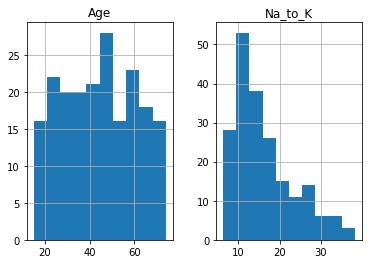

In [10]:
df.hist()

#### Preprocessing the Data:

In [11]:
from sklearn import preprocessing

In [12]:
sex_new = preprocessing.LabelEncoder()
sex_new.fit(['F','M'])
x[:,1] = sex_new.transform(x[:,1]) 


BP_new = preprocessing.LabelEncoder()
BP_new.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = BP_new.transform(x[:,2])


Chol_new = preprocessing.LabelEncoder()
Chol_new.fit([ 'NORMAL', 'HIGH'])
x[:,3] = Chol_new.transform(x[:,3]) 

In [13]:
x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [14]:
y = df['Drug']

In [15]:
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

##### Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing

In [16]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, random_state = 0 )

### Modeling
#### Using sklearn package to model data.

In [17]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
tree.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Predicition :

In [18]:
pred = tree.predict(test_x)

In [19]:
pred

array(['drugC', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugC', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugX'], dtype=object)

### Evaluation :

In [20]:
from sklearn import metrics
metrics.accuracy_score(test_y, pred)

1.0